## A2

## Data Wrangling, II

Create an “Academic performance” dataset of students and perform the following operations using Python. 
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, 
or to decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

**2. Link of Dataset(Academic Performance):**

**The given dataset is modified as per requirements of the following assignment.**

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

**1) Import Required Libraries**

pandas → data handling

numpy → numerical operations

matplotlib & seaborn → graphs/plots

scipy.stats → Z-score calculation

sklearn.preprocessing → scaling data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**2) Load the Dataset**

In [45]:
# Load the Academic Performance of Students modified dataset
df = pd.read_csv("StudentsPerformance_modified.csv")

In [46]:
# Display first 5 rows
df.head()

,gender,race,parent_edu,lunch,test_prep_course,dbms_score,cns_score,os_score,total_marks,cgpa
0,female,group B,bachelor's degree,standard,none,72,72,74,218.0,7.27
1,female,group C,some college,standard,completed,69,90,88,247.0,8.23
2,female,group B,master's degree,standard,none,90,95,93,278.0,9.27
3,male,group A,associate's degree,free/reduced,none,47,57,44,148.0,4.93
4,male,group C,some college,standard,none,76,78,75,229.0,7.63


**3) Understand Dataset Structure**

In [47]:
# Dimensions of dataset
df.shape

(1000, 10)

In [48]:
# Datatypes of each column
df.dtypes

gender               object
race                 object
parent_edu           object
lunch                object
test_prep_course     object
dbms_score            int64
cns_score             int64
os_score              int64
total_marks         float64
cgpa                float64
dtype: object

In [49]:
# Display info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1000 non-null   object 
 1   race              1000 non-null   object 
 2   parent_edu        1000 non-null   object 
 3   lunch             1000 non-null   object 
 4   test_prep_course  1000 non-null   object 
 5   dbms_score        1000 non-null   int64  
 6   cns_score         1000 non-null   int64  
 7   os_score          1000 non-null   int64  
 8   total_marks       980 non-null    float64
 9   cgpa              980 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [50]:
# Display statistical summary
df.describe()

,dbms_score,cns_score,os_score,total_marks,cgpa
count,1000.00000,1000.000000,1000.000000,980.000000,980.000000
mean,66.08900,69.169000,68.054000,204.861224,6.826816
std,15.16308,14.600192,15.195657,45.879946,1.532550
min,0.00000,17.000000,10.000000,55.000000,0.900000
25%,57.00000,59.000000,57.750000,175.000000,5.830000
50%,66.00000,70.000000,69.000000,205.500000,6.870000
75%,77.00000,79.000000,79.000000,234.000000,7.800000
max,100.00000,100.000000,100.000000,450.000000,15.000000


**1. Scan all variables for missing values and inconsistencies. If 
there are missing values and/or inconsistencies, use any of 
the suitable techniques to deal with them.**

**4) Check for missing values**

In [51]:
# Check for missing values
df.isnull().sum()

gender               0
race                 0
parent_edu           0
lunch                0
test_prep_course     0
dbms_score           0
cns_score            0
os_score             0
total_marks         20
cgpa                20
dtype: int64

In [52]:
# Percentage of missing values
df.isnull().mean() * 100

gender              0.0
race                0.0
parent_edu          0.0
lunch               0.0
test_prep_course    0.0
dbms_score          0.0
cns_score           0.0
os_score            0.0
total_marks         2.0
cgpa                2.0
dtype: float64

**5) Handle Missing Values**

In [53]:
df['total_marks'] = df['total_marks'].fillna(df['total_marks'].mean())
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())

In [54]:
df.isnull().sum()

gender              0
race                0
parent_edu          0
lunch               0
test_prep_course    0
dbms_score          0
cns_score           0
os_score            0
total_marks         0
cgpa                0
dtype: int64

**Check Inconsistencies**

In [55]:
df[df['cgpa'] > 10]

,gender,race,parent_edu,lunch,test_prep_course,dbms_score,cns_score,os_score,total_marks,cgpa
93,male,group C,associate's degree,free/reduced,completed,43,45,50,138.0,15.0
100,male,group B,some college,standard,none,79,67,67,213.0,15.0
562,male,group C,bachelor's degree,standard,completed,96,90,92,278.0,15.0
692,female,group C,bachelor's degree,free/reduced,completed,66,74,81,221.0,15.0
729,male,group C,some college,standard,none,53,39,37,129.0,15.0


In [56]:
df[df['total_marks'] > 300]

,gender,race,parent_edu,lunch,test_prep_course,dbms_score,cns_score,os_score,total_marks,cgpa
264,male,group D,high school,standard,none,76,73,68,450.0,7.23
393,male,group C,associate's degree,standard,completed,57,54,56,450.0,5.57
685,female,group E,master's degree,standard,completed,94,99,100,450.0,9.77
738,male,group D,associate's degree,standard,none,81,71,73,450.0,7.50
924,male,group D,high school,free/reduced,none,74,70,69,450.0,7.10


**2. Scan all numeric variables for outliers. If there are outliers, 
use any of the suitable techniques to deal with them.**

In [57]:
numeric_cols = ['dbms_score', 'cns_score', 'os_score', 'total_marks', 'cgpa']

**6) Detect Outliers**

**6.1 Boxplot Method**

Box and Whisker Plot/Boxplots are a standardized way of displaying the distribution of data based on a five number summary 

(“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).


**“minimum”:** Q1 -1.5*IQR

**first quartile (Q1/25th Percentile):** the middle number between the smallest number (not the “minimum”) and the median of the dataset.

**median (Q2/50th Percentile):** the middle value of the dataset.

**third quartile (Q3/75th Percentile):** the middle value between the median and the highest value (not the “maximum”) of the dataset.

**interquartile range (IQR):** 25th to the 75th percentile.

**whiskers (shown in blue)**

**outliers (shown as green circles)**

**“maximum”:** Q3 + 1.5*IQR

![Boxplot Example](boxplotexplained.png)

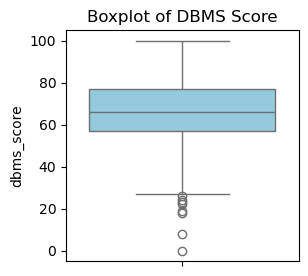

In [58]:
# Boxplot of DBMS Score
plt.figure(figsize=(3,3))
sns.boxplot(y=df['dbms_score'], color='skyblue')
plt.title("Boxplot of DBMS Score")
plt.show()

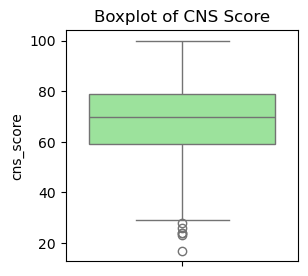

In [59]:
# Boxplot of CNS Score
plt.figure(figsize=(3,3))
sns.boxplot(y=df['cns_score'], color='lightgreen')
plt.title("Boxplot of CNS Score")
plt.show()

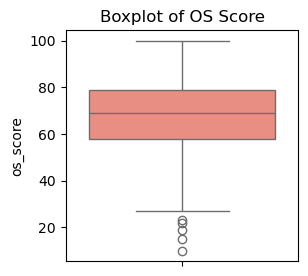

In [60]:
# Boxplot of OS Score
plt.figure(figsize=(3,3))
sns.boxplot(y=df['os_score'], color='salmon')
plt.title("Boxplot of OS Score")
plt.show()

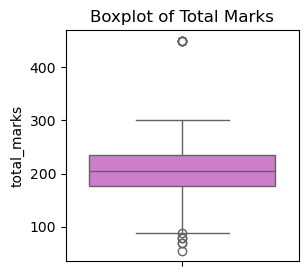

In [61]:
# Boxplot of Total Marks
plt.figure(figsize=(3,3))
sns.boxplot(y=df['total_marks'], color='orchid')
plt.title("Boxplot of Total Marks")
plt.show()

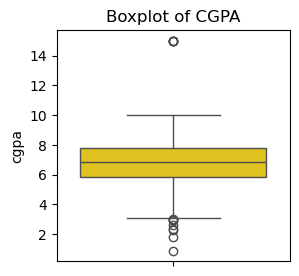

In [62]:
# Boxplot of CGPA
plt.figure(figsize=(3,3))
sns.boxplot(y=df['cgpa'], color='gold')
plt.title("Boxplot of CGPA")
plt.show()

**6.2 Z-Score/ Standard Score**

Z-score measures how far a value is from the mean.

If |Z| > 3 → it is an outlier.

**Z-Score Formula**

![Z-score formula](z-score.png)

In [63]:
# Calculate z-score for all 5 numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers_z = (z_scores > 3).sum(axis=0)

In [64]:
# New table created with z-scores for all numeric_cols
z_scores

array([[0.39002351, 0.19399858, 0.39149181, 0.28942807, 0.29226564],
       [0.19207553, 1.42747598, 1.31326868, 0.92825578, 0.92535534],
       [1.57771141, 1.77010859, 1.64247471, 1.61114058, 1.61120252],
       ...,
       [0.46775108, 0.12547206, 0.20107904, 0.2172284 , 0.21552505],
       [0.12609287, 0.60515772, 0.58901542, 0.39957078, 0.39778059],
       [0.71993682, 1.15336989, 1.18158627, 0.97231287, 0.97151813]],
      shape=(1000, 5))

In [65]:
# displays total no. of outliers for each of 5 columns
outliers_z

array([4, 4, 4, 6, 7])

In [66]:
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols)

# Show only rows where at least one column has an outlier
outlier_table = z_scores_df[(z_scores_df > 3).any(axis=1)]
print(outlier_table)

     dbms_score  cns_score  os_score  total_marks          cgpa
17     3.173040   2.547062  2.637204     2.794568  2.787452e+00
59     4.360728   3.574960  3.822345     0.000000  3.908548e+00
76     2.381248   2.958221  3.032251     2.794568  5.857256e-16
93     1.523474   1.656218  1.188697     1.472855  5.389957e+00
100    0.851902   0.148634  0.069397     0.179285  5.389957e+00
264    0.653954   0.262525  0.003555     5.400050  2.658869e-01
327    2.513214   3.163801  3.229774     2.970796  2.965508e+00
393    0.599716   1.039479  0.793650     5.400050  8.288307e-01
562    1.973607   1.427476  1.576634     1.611141  5.389957e+00
596    2.381248   3.095274  3.493139     2.992825  2.985292e+00
685    1.841642   2.044215  2.103363     5.400050  1.940937e+00
692    0.005872   0.331052  0.852380     0.355514  5.389957e+00
729    0.863647   2.067377  2.044633     1.671112  5.389957e+00
738    0.983867   0.125472  0.325651     5.400050  4.439434e-01
787    3.107058   2.135903  2.373839    

**6.3 IQR Method**


1. **IQR (Interquartile Range)** measures the spread of the middle 50% of data.


   **IQR = Q3 - Q1**

3. **Q1 (First Quartile)** = 25th percentile of the data.

4. **Q3 (Third Quartile)** = 75th percentile of the data.

5. **Lower Bound Formula:**
   
   **Lower Bound = Q1 - 1.5 * IQR**

6. **Upper Bound Formula:**
   
   **Upper Bound = Q3 + 1.5 * IQR**

7. Any data value **below the lower bound** or **above the upper bound** is considered an **outlier**.

8. The factor **1.5** is a standard rule that helps detect unusual values without being too strict.

In [67]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25th Percentile):\n", Q1)
print("\nQ3 (75th Percentile):\n", Q3)
print("\nIQR (Q3 - Q1):\n", IQR)

Q1 (25th Percentile):
 dbms_score      57.00
cns_score       59.00
os_score        57.75
total_marks    176.00
cgpa             5.87
Name: 0.25, dtype: float64

Q3 (75th Percentile):
 dbms_score      77.00
cns_score       79.00
os_score        79.00
total_marks    234.00
cgpa             7.77
Name: 0.75, dtype: float64

IQR (Q3 - Q1):
 dbms_score     20.00
cns_score      20.00
os_score       21.25
total_marks    58.00
cgpa            1.90
dtype: float64


In [68]:
# Step 2: Calculate Lower and Upper Bounds
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

print("\nLower Bounds:\n", lower_bounds)
print("\nUpper Bounds:\n", upper_bounds)


Lower Bounds:
 dbms_score     27.000
cns_score      29.000
os_score       25.875
total_marks    89.000
cgpa            3.020
dtype: float64

Upper Bounds:
 dbms_score     107.000
cns_score      109.000
os_score       110.875
total_marks    321.000
cgpa            10.620
dtype: float64


In [69]:
# Step 3: Count Outliers in Each Column
outlier_counts = ((df[numeric_cols] < lower_bounds) | 
                  (df[numeric_cols] > upper_bounds)).sum()

print("\nNumber of Outliers in Each Column:\n", outlier_counts)


Number of Outliers in Each Column:
 dbms_score      8
cns_score       6
os_score        5
total_marks    11
cgpa           14
dtype: int64


In [70]:
# Step 4: Show Actual Outlier Values Column-wise
for col in numeric_cols:
    print(f"\nOutliers in {col}:")
    print(df.loc[(df[col] < lower_bounds[col]) | (df[col] > upper_bounds[col]), col])


Outliers in dbms_score:
17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: dbms_score, dtype: int64

Outliers in cns_score:
59     17
76     26
211    28
327    23
596    24
980    24
Name: cns_score, dtype: int64

Outliers in os_score:
59     10
76     22
327    19
596    15
980    23
Name: os_score, dtype: int64

Outliers in total_marks:
17      78.0
76      78.0
264    450.0
327     70.0
393    450.0
596     69.0
601     88.0
685    450.0
738    450.0
924    450.0
980     55.0
Name: total_marks, dtype: float64

Outliers in cgpa:
17      2.60
59      0.90
93     15.00
100    15.00
211     3.00
327     2.33
338     2.97
562    15.00
596     2.30
601     2.93
692    15.00
729    15.00
787     2.97
980     1.83
Name: cgpa, dtype: float64


**7) Treat Outliers**

We can replace outlier values with mean/median or remove them

In [71]:
df_before = df.copy()

**7.1 Z-Score Method**

Replace extreme values with the column mean.

In [72]:
for col in numeric_cols:
    z = np.abs(stats.zscore(df[col]))
    df[col] = np.where(z > 3, df[col].mean(), df[col])

In [73]:
# Check result applied
changed_rows = df_before[numeric_cols] != df[numeric_cols]
print(df.loc[changed_rows.any(axis=1), numeric_cols])

     dbms_score  cns_score  os_score  total_marks      cgpa
17       66.089     32.000    28.000    78.000000  2.600000
59       66.089     69.169    68.054   204.861224  6.826816
76       30.000     26.000    68.054    78.000000  6.826816
93       43.000     45.000    50.000   138.000000  6.826816
100      79.000     67.000    67.000   213.000000  6.826816
264      76.000     73.000    68.000   204.861224  7.230000
327      28.000     69.169    68.054    70.000000  2.330000
393      57.000     54.000    56.000   204.861224  5.570000
562      96.000     90.000    92.000   278.000000  6.826816
596      30.000     69.169    68.054    69.000000  2.300000
685      94.000     99.000   100.000   204.861224  9.770000
692      66.000     74.000    81.000   221.000000  6.826816
729      53.000     39.000    37.000   129.000000  6.826816
738      81.000     71.000    73.000   204.861224  7.500000
787      66.089     38.000    32.000    89.000000  2.970000
924      74.000     70.000    69.000   2

**7.2 IQR Method**

Capping / Winsorization (Clamp to boundary values)


In [74]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                 np.where(df[col] > upper, upper, df[col]))

**8) Data Transformation – Scaling/ Normalization**

**Observe Distribution BEFORE Transformation**

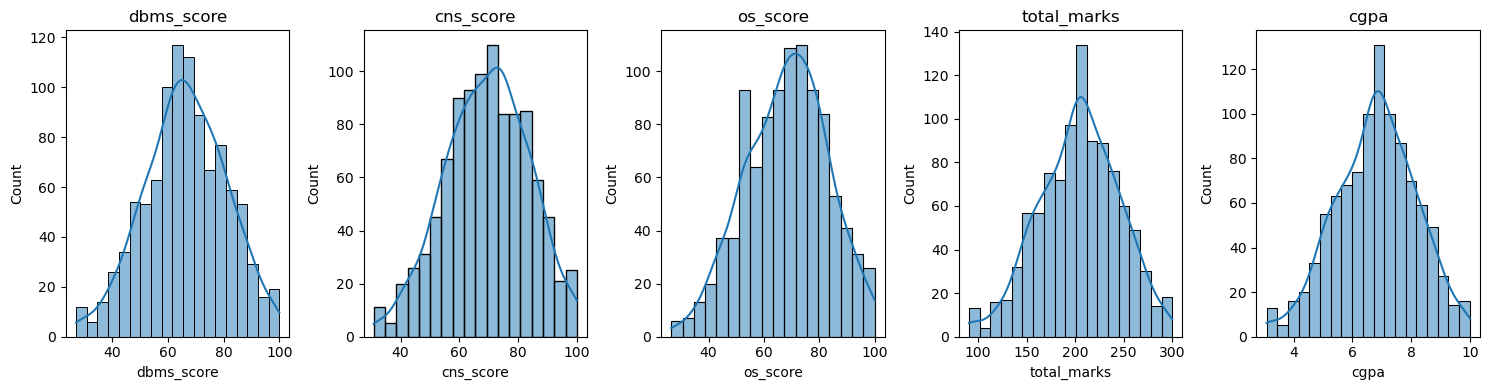

In [75]:
plt.figure(figsize=(15,4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

**8.1 Min-Max Scaling**



![Min-Max Scaling Formula](minmax.png)

In [76]:
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])
df_minmax.head()

,gender,race,parent_edu,lunch,test_prep_course,dbms_score,cns_score,os_score,total_marks,cgpa
0,female,group B,bachelor's degree,standard,none,0.616438,0.594937,0.646259,0.608592,0.605491
1,female,group C,some college,standard,completed,0.575342,0.855335,0.836735,0.747017,0.744220
2,female,group B,master's degree,standard,none,0.863014,0.927667,0.904762,0.894988,0.894509
3,male,group A,associate's degree,free/reduced,none,0.273973,0.377939,0.238095,0.274463,0.267341
4,male,group C,some college,standard,none,0.671233,0.681736,0.659864,0.661098,0.657514


**Observe Distribution AFTER Min-Max Scaling**

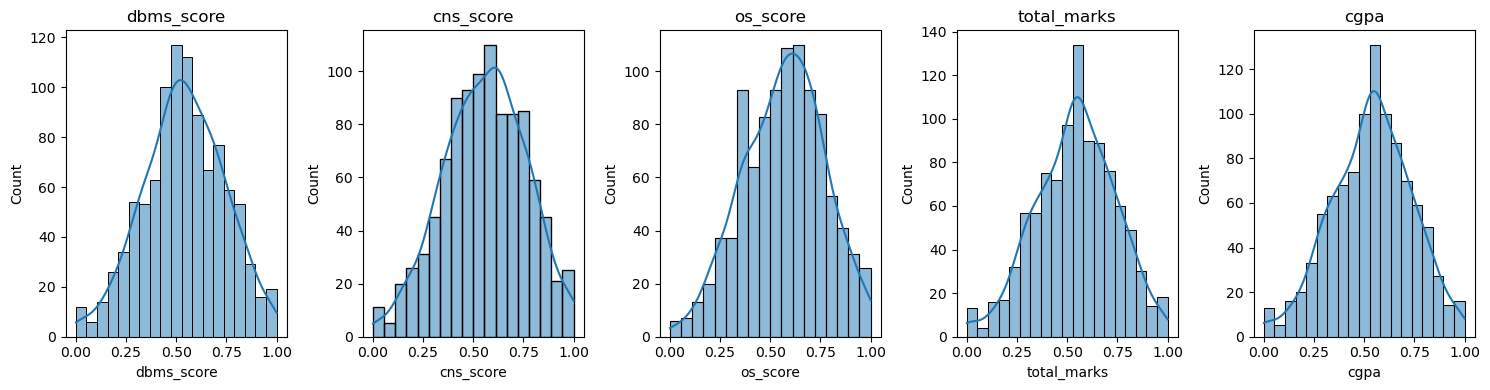

In [77]:
plt.figure(figsize=(15,4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(df_minmax[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

**8.2 Standard Scaling**



![Standard Scaling Formula](standard.png)

In [78]:
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

df_standard.head()

,gender,race,parent_edu,lunch,test_prep_course,dbms_score,cns_score,os_score,total_marks,cgpa
0,female,group B,bachelor's degree,standard,none,0.386119,0.184621,0.387077,0.341090,0.342845
1,female,group C,some college,standard,completed,0.182134,1.447790,1.331778,1.040559,1.042148
2,female,group B,master's degree,standard,none,1.610026,1.798670,1.669171,1.788268,1.799726
3,male,group A,associate's degree,free/reduced,none,-1.313753,-0.868020,-1.637283,-1.347283,-1.361706
4,male,group C,some college,standard,none,0.658098,0.605677,0.454555,0.606406,0.605083


**Observe Distribution AFTER Standard Scaling**

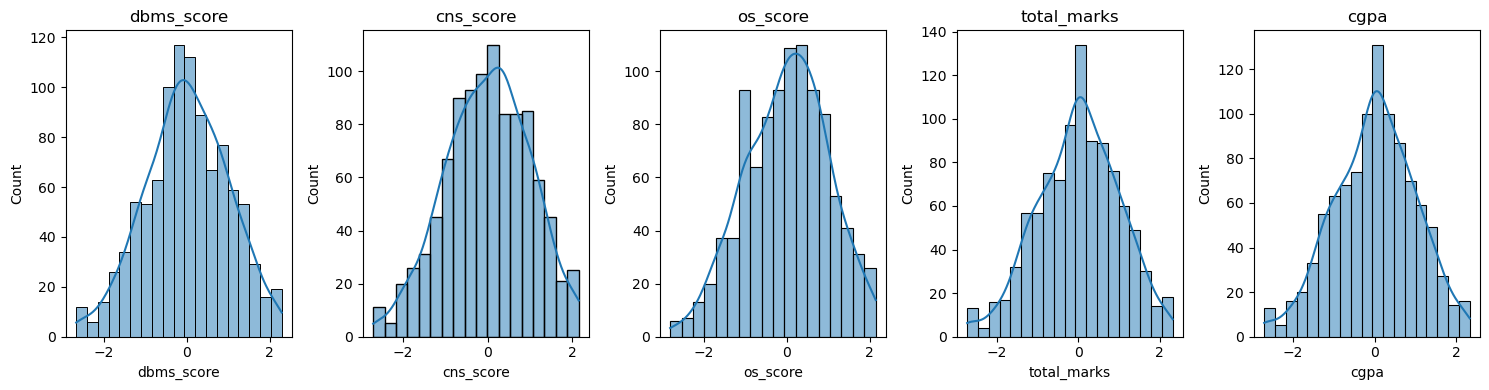

In [79]:
plt.figure(figsize=(15,4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(df_standard[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

**Check Skewness of numeric columns**

Interpretation:

Skew ≈ 0 → Normal

Skew > 0 → Right skewed

Skew < 0 → Left skewed


**Main Types of Data Distributions**

**Normal Distribution (Bell-shaped)**

* Symmetric
* Mean ≈ Median ≈ Mode
* Most values in the middle



**Positively Skewed (Right-skewed)**

* Tail on the **right side**
* Mean > Median > Mode
* Most values are small, few very large values



**Negatively Skewed (Left-skewed)**

* Tail on the **left side**
* Mean < Median < Mode
* Most values are large, few very small values

![Skewness](skew.png)

In [80]:
df[numeric_cols].skew()

dbms_score    -0.111525
cns_score     -0.154365
os_score      -0.175500
total_marks   -0.191162
cgpa          -0.173287
dtype: float64